# Non-Linear Partial Least Squares Regression (PLSR)

## 1. Introduction

- **Goal of regression:** predict a response variable `y` from explanatory variables `X`.
- **Challenge:** when predictors are highly collinear or when the number of predictors >> observations.
- **Partial Least Squares Regression (PLSR):**  
  - Projects predictors into a lower-dimensional latent space.  
  - Maximizes covariance between `X` (predictors) and `Y` (response).  
  - Works well when predictors are correlated.  

PLS is **linear by default**, but many real-world problems show **non-linear relationships**.  
This notebook introduces PLS, its limitations, and extensions for **non-linear modeling**.

## 2. The Idea of PLS

- PLS finds **latent components** (linear combinations of predictors).
- These components maximize the covariance with the response variable.  
- Compared to PCA:  
  - PCA only maximizes variance in `X`.  
  - PLS maximizes **covariance** between `X` and `Y`.

Mathematically (simplified):

$$
\text{Find weight vector } w \text{ such that } t = Xw \quad \text{maximizes } \text{Cov}(t, y).
$$

where `t` is a latent variable.

## 3. Linear PLSR Example

Linear PLS R2: 0.9849477438297358


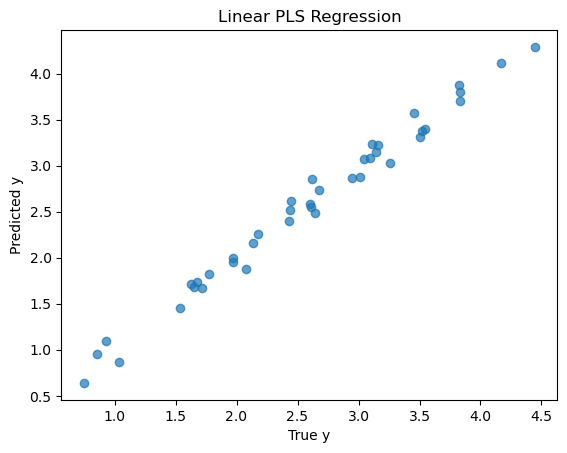

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Synthetic linear data
np.random.seed(42)
X = np.random.rand(200, 5)
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(200) * 0.1  # linear relation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

print("Linear PLS R2:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Linear PLS Regression")
plt.show()

**Observation:**  
PLS performs well on linear data, handling multicollinearity and dimensionality reduction.  

But what happens when the relationship is **non-linear**?

## 4. Limitation: Non-linear Relationships

Linear PLS on nonlinear data - R2: 0.7711105368160819


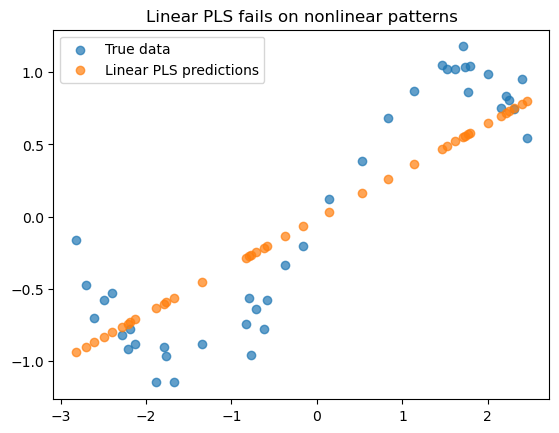

In [6]:
# Synthetic non-linear data
np.random.seed(42)
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1*np.random.randn(200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply linear PLS
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

print("Linear PLS on nonlinear data - R2:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, label="True data", alpha=0.7)
plt.scatter(X_test, y_pred, label="Linear PLS predictions", alpha=0.7)
plt.legend()
plt.title("Linear PLS fails on nonlinear patterns")
plt.show()

**Observation:**  
Linear PLS cannot capture the sine-wave structure. We need **non-linear extensions**.

## 5. Non-linear PLS Approaches

Several strategies exist:

1. **Polynomial PLS**  
   - Expand features with polynomial terms.  
   - Capture non-linear interactions.  

2. **Kernel PLS**  
   - Use kernel trick (similar to SVM).  
   - Map data into higher-dimensional space.  

3. **Spline-based PLS**  
   - Model smooth non-linear functions.  

4. **Neural Network PLS (NN-PLS)**  
   - Combine latent structure modeling with neural nets.  

In this notebook, we’ll demonstrate **Polynomial PLS**.

## 6. Non-linear PLS Example (Polynomial Expansion)

Non-linear (Poly) PLS R2: 0.9815085951604963


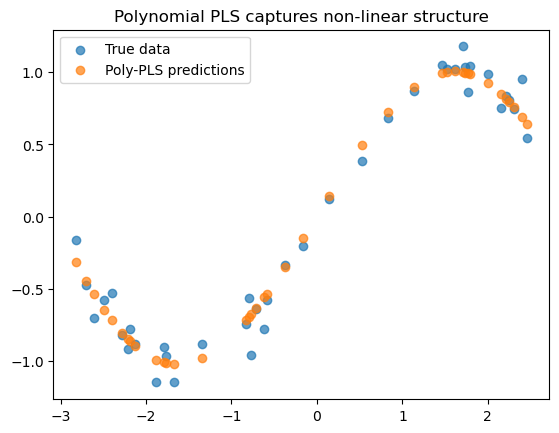

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial feature expansion
degree = 5
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

pls_poly = PLSRegression(n_components=degree)
pls_poly.fit(X_poly_train, y_train)
y_pred_poly = pls_poly.predict(X_poly_test)

print("Non-linear (Poly) PLS R2:", r2_score(y_test, y_pred_poly))

plt.scatter(X_test, y_test, label="True data", alpha=0.7)
plt.scatter(X_test, y_pred_poly, label="Poly-PLS predictions", alpha=0.7)
plt.legend()
plt.title("Polynomial PLS captures non-linear structure")
plt.show()

## 7. Summary

- **PLS Regression**: robust method for high-dimensional, collinear data.  
- **Limitation**: standard PLS assumes linearity.  
- **Extensions**: polynomial PLS, kernel PLS, neural network PLS.  
- **Takeaway**: With feature engineering (e.g., polynomial expansion), PLS can model non-linear data effectively.  

---

## 8. References

- Geladi, P., & Kowalski, B. R. (1986). *Partial least-squares regression: a tutorial*. Analytica Chimica Acta.  
- Rosipal, R., & Krämer, N. (2006). *Overview and recent advances in partial least squares*. Springer.  
- Martens, H., & Næs, T. (1989). *Multivariate Calibration*. Wiley.  